# Statystyczne metody przetwarzania danych 

## Laboratorium 1 - algorytm Najbliższego Sąsiada (NN)


### Opis

Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

### Termin
Zadanie należy wykonać w trakcie trwania laboratorium.

### System oceniania

| Liczba punktów (procentowo) | Ocena |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Punkty ujemne</u>

* `ocena - 0.5` jeżeli zadanie wysłano po laboratorium, ale < 7 dni; 
* `ocena - 1` jeżeli zadanie wysłano w terminie pomiędzy 7 a 14 dni;
* `ocena - 1.5` jeżeli zadanie wysłano po upływie 14 dni, ale przed ostatnim laboratorium;
* `ocena = 2` jeżeli zadanie wysłano po ostatnim laboratorium.

<u>Uwaga:</u>

Niedopuszczalne jest dzielenie się notatnikiem (plik `.ipynb`) z innymi studentami ani udostępnianie go w Internecie. Każdy student powinien pobrać notatnik samodzielnie z platformy WIKAMP.
Wysyłając zadanie potwierdasz, że wykonałeś je samodzielnie i jest to Twoja indywidualna praca a materiał przedstawiony w tej pracy jest dla Ciebie zrozumiały. Prace bardzo podobne albo grupowe będą uznawane za plagiat.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Dodatkowe narzędzia

Dopuszczalne jest korzystanie z bibliotek: `numpy`, `pandas`, `matplotlib`.
Implementacja klasyfikatora powinna być wykonana samodzielnie (bez dodatkowych bibliotek).



### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [1]:
import numpy as np
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [2]:
print("ilośc próbek treningowych: "+len(train).__str__())
print("ilośc próbek testowych: "+len(test).__str__())
lacznie = len(train) + len(test)
print("lacznie wszystkich probek jest: "+lacznie.__str__())
lista_statystyki_klas = np.zeros(40)
# print(lista_statystyki_klas)
for probka in train:
    lista_statystyki_klas[int(probka[0]-1.0)] += 1
print("próbek poszczególnych klas w zestawie treningowym jest(indeks odpowiada klasie gdzie 0 to klasa pierwsza): ")
print(lista_statystyki_klas)

lista_statystyki_klas = np.zeros(40)
for probka in test:
    lista_statystyki_klas[int(probka[0]-1.0)] += 1
print("próbek poszczególnych klas w zestawie testowym jest(indeks odpowiada klasie gdzie 0 to klasa pierwsza): ")
print(lista_statystyki_klas)
# nie wszystkie klasy mają próbki w zbiorze treningowym ale mają w zbiorze testowym

ilośc próbek treningowych: 2244
ilośc próbek testowych: 1496
lacznie wszystkich probek jest: 3740
próbek poszczególnych klas w zestawie treningowym jest(indeks odpowiada klasie gdzie 0 to klasa pierwsza): 
[ 77.  66.  55.  66.  77.  44.  44.  33. 121.  88.  88.  77.  99.  66.
  66.   0.   0.   0.   0.   0.   0. 121.  77.  77.  66.  99.  55.  66.
 110.  77.  77.  66.  66.  99.  88.  33.   0.   0.   0.   0.]
próbek poszczególnych klas w zestawie testowym jest(indeks odpowiada klasie gdzie 0 to klasa pierwsza): 
[55. 44. 55. 22. 55. 44. 66. 88. 33. 55. 88. 55. 44. 66. 44.  0.  0.  0.
  0.  0.  0. 11. 44. 66. 33. 33. 66. 66. 22. 55. 44. 55. 55. 22. 33. 77.
  0.  0.  0.  0.]


### Zadanie 3

Wybierz obserwacje należące do poniższych klas (rodzaje liści):
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.


In [3]:
lista_trojek = []
lista_piatek = []
for probka in train:
    if int(probka[0]) == 3:
        lista_trojek.append(probka)
    elif int(probka[0]) == 5:
        lista_piatek.append(probka)
print("liczba probek z klasy 3: " +len(lista_trojek).__str__())
print("liczba probek z klasy 5: " +len(lista_piatek).__str__())

liczba probek z klasy 3: 55
liczba probek z klasy 5: 77


### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*).<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych wyżej cech.

Poniższy kod importuje kolekcję funkcji przydatnych do wizualizacji z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).

```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

* Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>
* Pyplot: <https://matplotlib.org/tutorials/introductory/pyplot.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples):
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
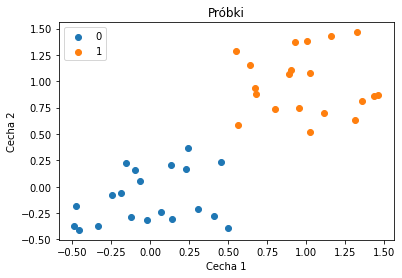


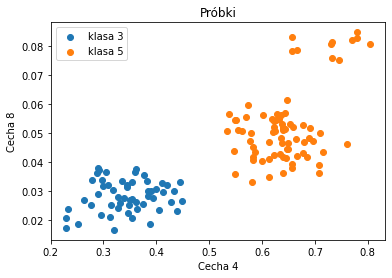

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Próbki")
wybrane_cechy = [4,8]
plt.xlabel(f"Cecha "+wybrane_cechy[0].__str__())
plt.ylabel(f"Cecha "+wybrane_cechy[1].__str__())
samples = []
temp_list0 = []
temp_list1 = []
for element in lista_trojek:
    temp_list0.append(element[wybrane_cechy[0]])
    temp_list1.append(element[wybrane_cechy[1]])
samples = [temp_list0,temp_list1]
temp_list0 = []
temp_list1 = []
for element in lista_piatek:
    temp_list0.append(element[wybrane_cechy[0]])
    temp_list1.append(element[wybrane_cechy[1]])

samples.append(temp_list0)
samples.append(temp_list1)
plt.scatter(x=samples[0],y=samples[1],label="klasa 3")
plt.scatter(x=samples[2],y=samples[3],label="klasa 5")
plt.legend()
# ma pytanie czy dałoby się to zrobić lepiej? odpowiadam defitywnie tak ale działa

### Zadanie 5

Zaimplementuj klasyfikator najbliższego sąsiada NN i uruchom predykcję na zbiorze testowym.

> Podpowiedź: Dla każdej obserwacji ze zbioru `test` należy odnaleźć najbliższego sąsiada w zbiorze `train` i zaklasyfikować obserwację do klasy najbliższego sąsiada.


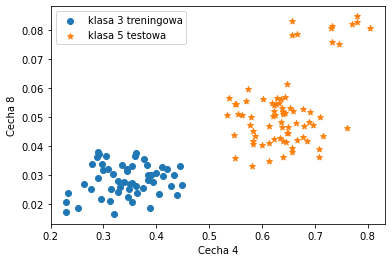

In [5]:
def getDistance(trained,tested,list_of_features):
    result = 0
    for feature in list_of_features:
            result += pow(tested[feature]-trained[feature],2)
    return np.sqrt(result)

def classify(list_of_trained_examples, single_tested_example, wybrane_cechy):
    temp_list = []
    for element in list_of_trained_examples:
        temp_list.append(getDistance(element,single_tested_example,wybrane_cechy))
    mindist = min(temp_list)
    return single_tested_example, list_of_trained_examples[temp_list.index(mindist)][0]

lista_trojek_testowych = []
lista_piatek_testowych = []
for probka in test:
    if int(probka[0]) == 3:
        lista_trojek_testowych.append(probka.tolist())
    elif int(probka[0]) == 5:
        lista_piatek_testowych.append(probka.tolist())

trainclassescombined= lista_trojek + lista_piatek
list_of_classifed = []
for to_be_tested in lista_trojek_testowych:
    list_of_classifed.append(classify(trainclassescombined,to_be_tested,wybrane_cechy))
for to_be_tested in lista_piatek_testowych:
    list_of_classifed.append(classify(trainclassescombined,to_be_tested,wybrane_cechy))

plt.xlabel(f"Cecha "+wybrane_cechy[0].__str__())
plt.ylabel(f"Cecha "+wybrane_cechy[1].__str__())
plt.scatter(x=samples[0],y=samples[1],label="klasa 3 treningowa",edgecolors='face')
plt.scatter(x=samples[2],y=samples[3],label="klasa 5 testowa",marker='*')
plt.legend()

### Zadanie 6

Wyświetl wyniki klasyfikacji (próbki treningowe i testowe), każda klasa w innym kolorze a próbki testowe innym "markerem".

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

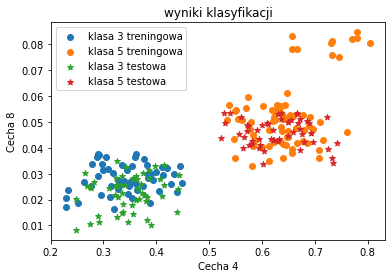

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("wyniki klasyfikacji")
wybranacecha1 = 4
wybranacecha2 = 8
plt.xlabel(f"Cecha "+wybranacecha1.__str__())
plt.ylabel(f"Cecha "+wybranacecha2.__str__())

samples = []
temp_list0 = []
temp_list1 = []
for element in lista_trojek:
    temp_list0.append(element[wybranacecha1])
    temp_list1.append(element[wybranacecha2])
samples = [temp_list0,temp_list1]

temp_list0 = []
temp_list1 = []
for element in lista_piatek:
    temp_list0.append(element[wybranacecha1])
    temp_list1.append(element[wybranacecha2])

lista_trojek_testowych = []
lista_piatek_testowych = []
for probka in test:
    if int(probka[0]) == 3:
        lista_trojek_testowych.append(probka.tolist())
    elif int(probka[0]) == 5:
        lista_piatek_testowych.append(probka.tolist())
samples.append(temp_list0)
samples.append(temp_list1)

temp_list0 = []
temp_list1 = []
for element in lista_trojek_testowych:
    temp_list0.append(element[wybranacecha1])
    temp_list1.append(element[wybranacecha2])
samples.append(temp_list0)
samples.append(temp_list1)

temp_list0 = []
temp_list1 = []
for element in lista_piatek_testowych:
    temp_list0.append(element[wybranacecha1])
    temp_list1.append(element[wybranacecha2])
samples.append(temp_list0)
samples.append(temp_list1)

plt.scatter(x=samples[0],y=samples[1],label="klasa 3 treningowa",edgecolors='face')
plt.scatter(x=samples[2],y=samples[3],label="klasa 5 treningowa",edgecolors='face')
plt.scatter(x=samples[4],y=samples[5],label="klasa 3 testowa", marker='*')
plt.scatter(x=samples[6],y=samples[7],label="klasa 5 testowa",marker='*')
plt.legend()

### Zadanie 7

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [7]:
counter_of_matching = 0
for element in list_of_classifed:
    if int(element[0][0]) == element[1]:
        counter_of_matching+=1
accuracy = counter_of_matching/len(list_of_classifed)
print("ilość dobrze oznaczonych: "+counter_of_matching.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")

ilość dobrze oznaczonych: 110
ilość wszystkich:110
procent dokładności: 100.00%


### Zadanie 8

Wybierz 5 dowolnych rodzajów liści (klasy) i przeprowadź eksperyment ponownie.

> Możesz połączyć wszystkie powyższe fragmenty kodu w wkleić w komórkę poniżej zmieniając liczbę klas.

In [8]:
import numpy as np
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
wybrane_cechy = [8,7]

def getDistance(trained,tested,list_of_features):
    result = 0
    for feature in list_of_features:
            result += pow(tested[feature]-trained[feature],2)
    return np.sqrt(result)

def classify(list_of_trained_examples, single_tested_example, wybrane_cechy):
    temp_list = []
    for element in list_of_trained_examples:
        temp_list.append(getDistance(element,single_tested_example,wybrane_cechy))
    mindist = min(temp_list)
    return single_tested_example, list_of_trained_examples[temp_list.index(mindist)][0]

lista_dwojek_testowych = []
lista_siodemek_testowych = []
lista_jedenastek_testowych = []
lista_czternastek_testowych = []
lista_dwudziestekdziewiatek_testowych = []
for probka in test:
    if int(probka[0]) == 2:
        lista_dwojek_testowych.append(probka.tolist())
    elif int(probka[0]) == 7:
        lista_siodemek_testowych.append(probka.tolist())
    elif int(probka[0]) == 11:
        lista_jedenastek_testowych.append(probka.tolist())
    elif int(probka[0]) == 14:
        lista_czternastek_testowych.append(probka.tolist())
    elif int(probka[0]) == 29:
        lista_dwudziestekdziewiatek_testowych.append(probka.tolist())

trainclassescombined = []
for probka in train:
    if int(probka[0]) == 2:
        trainclassescombined.append(probka.tolist())
    elif int(probka[0]) == 7:
        trainclassescombined.append(probka.tolist())
    elif int(probka[0]) == 11:
        trainclassescombined.append(probka.tolist())
    elif int(probka[0]) == 14:
        trainclassescombined.append(probka.tolist())
    elif int(probka[0]) == 29:
        trainclassescombined.append(probka.tolist())


list_of_classifed = []
for to_be_tested in lista_dwojek_testowych:
    list_of_classifed.append(classify(trainclassescombined,to_be_tested,wybrane_cechy))
for to_be_tested in lista_siodemek_testowych:
    list_of_classifed.append(classify(trainclassescombined,to_be_tested,wybrane_cechy))
for to_be_tested in lista_jedenastek_testowych:
    list_of_classifed.append(classify(trainclassescombined,to_be_tested,wybrane_cechy))
for to_be_tested in lista_czternastek_testowych:
    list_of_classifed.append(classify(trainclassescombined,to_be_tested,wybrane_cechy))
for to_be_tested in lista_dwudziestekdziewiatek_testowych:
    list_of_classifed.append(classify(trainclassescombined,to_be_tested,wybrane_cechy))


counter_of_matching = 0
for element in list_of_classifed:
    if int(element[0][0]) == element[1]:
        counter_of_matching+=1
accuracy = counter_of_matching/len(list_of_classifed)
print("ilość dobrze oznaczonych: "+counter_of_matching.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")

ilość dobrze oznaczonych: 200
ilość wszystkich:286
procent dokładności: 69.93%


### Zadanie 9

Przeprowadź eksperyment ponownie dla większej liczby cech.

In [9]:
import numpy as np
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
wybrane_cechy = [8,7,6,4,2]

def getDistance(trained,tested,list_of_features):
    result = 0
    for feature in list_of_features:
            result += pow(tested[feature]-trained[feature],2)
    return np.sqrt(result)

def classify(list_of_trained_examples, single_tested_example, wybrane_cechy):
    temp_list = []
    for element in list_of_trained_examples:
        temp_list.append(getDistance(element,single_tested_example,wybrane_cechy))
    mindist = min(temp_list)
    return single_tested_example, list_of_trained_examples[temp_list.index(mindist)][0]

lista_dwojek_testowych = []
lista_siodemek_testowych = []
lista_jedenastek_testowych = []
lista_czternastek_testowych = []
lista_dwudziestekdziewiatek_testowych = []
for probka in test:
    if int(probka[0]) == 2:
        lista_dwojek_testowych.append(probka.tolist())
    elif int(probka[0]) == 7:
        lista_siodemek_testowych.append(probka.tolist())
    elif int(probka[0]) == 11:
        lista_jedenastek_testowych.append(probka.tolist())
    elif int(probka[0]) == 14:
        lista_czternastek_testowych.append(probka.tolist())
    elif int(probka[0]) == 29:
        lista_dwudziestekdziewiatek_testowych.append(probka.tolist())

trainclassescombined = []
for probka in train:
    if int(probka[0]) == 2:
        trainclassescombined.append(probka.tolist())
    elif int(probka[0]) == 7:
        trainclassescombined.append(probka.tolist())
    elif int(probka[0]) == 11:
        trainclassescombined.append(probka.tolist())
    elif int(probka[0]) == 14:
        trainclassescombined.append(probka.tolist())
    elif int(probka[0]) == 29:
        trainclassescombined.append(probka.tolist())


list_of_classifed = []
for to_be_tested in lista_dwojek_testowych:
    list_of_classifed.append(classify(trainclassescombined,to_be_tested,wybrane_cechy))
for to_be_tested in lista_siodemek_testowych:
    list_of_classifed.append(classify(trainclassescombined,to_be_tested,wybrane_cechy))
for to_be_tested in lista_jedenastek_testowych:
    list_of_classifed.append(classify(trainclassescombined,to_be_tested,wybrane_cechy))
for to_be_tested in lista_czternastek_testowych:
    list_of_classifed.append(classify(trainclassescombined,to_be_tested,wybrane_cechy))
for to_be_tested in lista_dwudziestekdziewiatek_testowych:
    list_of_classifed.append(classify(trainclassescombined,to_be_tested,wybrane_cechy))


counter_of_matching = 0
for element in list_of_classifed:
    if int(element[0][0]) == element[1]:
        counter_of_matching+=1
accuracy = counter_of_matching/len(list_of_classifed)
print("ilość dobrze oznaczonych: "+counter_of_matching.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")

ilość dobrze oznaczonych: 174
ilość wszystkich:286
procent dokładności: 60.84%


### Zadanie 10

Napisz wnioski z przeprowadzonego eksperymentu.

Poprzez zwiększenie ilości cech po których algorytm miał klasyfikować obiekty
zmniejszył się procent poprwanie dopasowanych obiektów do klas moze być to spowodowane przeuczeniem algorytmu.
Jednakże obarczone było to kosztem czasu wykonywania skryptu.